In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import re

In [3]:
import lime_sk
import text_processing
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.naive_bayes import MultinomialNB
#from pprint import pprint

In [4]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import f1_score, accuracy_score, average_precision_score

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import fetch_20newsgroups

In [7]:
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
class_names = ['atheism', 'christian']

In [8]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

In [9]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(train_vectors, newsgroups_train.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
pred = rf.predict(test_vectors)
sklearn.metrics.f1_score(newsgroups_test.target, pred, average='binary')

0.9187935034802783

In [11]:
idx = 83
instance = test_vectors[idx]
label = rf.predict(instance)[0]
print('label:', label, '\nproba:', rf.predict_proba(instance)[0][label])

label: 0 
proba: 0.574


In [12]:
rf.predict_proba(instance)

array([[0.574, 0.426]])

In [13]:
explainer = text_processing.TextExplainer(distance='cosine', kernel_width=3.)

In [14]:
explanation = explainer.explain_prediction(instance, label, np.array(vectorizer.get_feature_names()), 
                                           rf, num_features=6, num_samples=1000)#, random_seed=42)

In [15]:
explanation.local_explanation

[('Host', 0.1655981435632738),
 ('Posting', 0.15570712653754556),
 ('NNTP', 0.12846604320278074),
 ('edu', 0.04061528162139006),
 ('University', -0.016571578155522973),
 ('Lines', -0.011665177545309564)]

In [16]:
explanation.score

0.9870331479234316

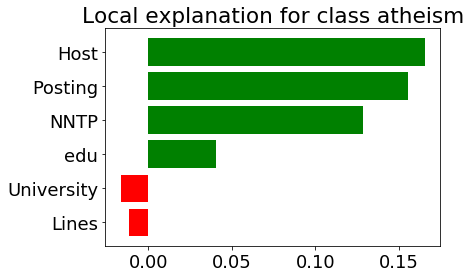

In [17]:
explanation.as_figure(class_names[label])

## Removing stopwords from 20newsdataset

In [32]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
mystopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anna.gubanova\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df_train = pd.DataFrame({
    'category': [newsgroups_train.target_names[i] for i in newsgroups_train.target],
    'data': [text for text in newsgroups_train.data],
}, columns=['category', 'data'])

df_train.head()

,category,data
0,soc.religion.christian,From: nigel.allen@canrem.com (Nigel Allen)\nSu...
1,alt.atheism,From: marshall@csugrad.cs.vt.edu (Kevin Marsha...
2,soc.religion.christian,From: tedr@athena.cs.uga.edu (Ted Kalivoda)\nS...
3,alt.atheism,From: keith@cco.caltech.edu (Keith Allan Schne...
4,soc.religion.christian,From: mayne@ds3.scri.fsu.edu (Bill Mayne)\nSub...


In [133]:
df_test = pd.DataFrame({
    'category': [newsgroups_test.target_names[i] for i in newsgroups_test.target],
    'data': [text for text in newsgroups_test.data],
}, columns=['category', 'data'])

df_test.head()

,category,data
0,soc.religion.christian,From: crackle!dabbott@munnari.oz.au (NAME)\nSu...
1,soc.religion.christian,From: tdarcos@access.digex.net (Paul Robinson)...
2,alt.atheism,From: madhaus@netcom.com (Maddi Hausmann)\nSub...
3,soc.religion.christian,From: mls@panix.com (Michael Siemon)\nSubject:...
4,alt.atheism,From: salem@pangea.Stanford.EDU (Bruce Salem)\...


In [ ]:
tokens_train = [' '.join(s.lower().split()) for s in df_train.data.tolist()]
tokens_train = [' '.join(re.findall('[A-Za-z]+', s)) for s in tokens_train]
df_train['tokens'] = tokens_train
df_train['category'][df_train['category'] == 'soc.religion.christian'] = 1
df_train['category'][df_train['category'] == 'alt.atheism'] = 0
df_train['top_tokens'] = tokens_train

In [ ]:
for i in range(df_train.shape[0]):
    df_train['top_tokens'][i] = ' '.join(list(set(df_train['tokens'][i].split()) - set(mystopwords)))

In [134]:
tokens_test = [' '.join(s.lower().split()) for s in df_test.data.tolist()]
tokens_test = [' '.join(re.findall('[A-Za-z]+', s)) for s in tokens_test]
df_test['tokens'] = tokens_test
df_test['category'][df_test['category'] == 'soc.religion.christian'] = 1
df_test['category'][df_test['category'] == 'alt.atheism'] = 0
df_test['top_tokens'] = tokens_test

In [139]:
for i in range(df_test.shape[0]):
    df_test['top_tokens'][i] = ' '.join(list(set(df_test['tokens'][i].split()) - set(mystopwords)))

In [140]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(df_train['top_tokens'])
test_vectors = vectorizer.transform(df_test['top_tokens'])

In [155]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=1000)
rf.fit(train_vectors, df.category.values.astype(int))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [156]:
pred = rf.predict(test_vectors)
sklearn.metrics.f1_score(df_test.category.values.astype(int), pred, average='binary')

0.935064935064935

In [157]:
idx = 83
instance = test_vectors[idx]
label = rf.predict(instance)[0]
print('label:', label, '\nproba:', rf.predict_proba(instance)[0][label])

label: 0 
proba: 0.606


In [158]:
rf.predict_proba(instance)

array([[0.606, 0.394]])

In [15]:
explainer = text_processing.TextExplainer(distance='cosine', kernel_width=3.)

In [16]:
explanation = explainer.explain_prediction(instance, label, np.array(vectorizer.get_feature_names()), 
                                           rf, num_features=6, num_samples=1000)#, random_seed=42)

[[ 1.40000000e+01  1.44962121e-01]
 [ 7.00000000e+00  1.39209813e-01]
 [ 1.10000000e+01  1.06828670e-01]
 [ 2.70000000e+01  5.01357168e-02]
 [ 9.00000000e+00 -9.86519979e-03]
 [ 1.20000000e+01 -9.57869785e-03]]


In [17]:
explanation.local_explanation

[('Posting', 0.14496212124277064),
 ('Host', 0.1392098129244738),
 ('NNTP', 0.10682867028737453),
 ('edu', 0.05013571676593315),
 ('Lines', -0.009865199793319433),
 ('New', -0.009578697845641544)]

In [18]:
explanation.score

0.9857397390811876

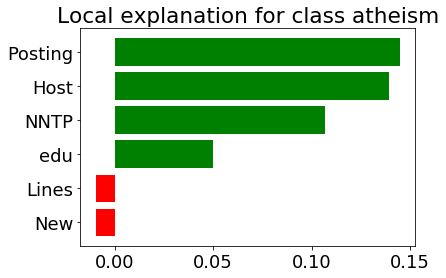

In [19]:
explanation.as_figure(class_names[label])

## Example with movie review twits

In [18]:
def load_movie_reviews():
    # movie_reviews is a sizeable corpus to import, so only load it if we have to
    from random import shuffle
    import string
    import nltk
    from nltk.corpus import movie_reviews, stopwords

    try:
        mystopwords = stopwords.words('english')
    except:
        nltk.download('stopwords')
        mystopwords = stopwords.words('english')
        
    try:
        movie_reviews.categories()
    except:
        import nltk
        print('This appears to be your first time using the NLTK Movie Reviews corpus. We will first download the necessary corpus (this is a one-time download that might take a little while')
        nltk.download('movie_reviews')

    raw_data = []

    # NLTK's corpus is structured in an interesting way
    # first iterate through the two categories (pos and neg)
    for category in movie_reviews.categories():

        if category == 'pos':
            pretty_category_name = 'positive'
        elif category == 'neg':
            pretty_category_name = 'negative'

        # each of these categories is just fileids, so grab those
        for fileid in movie_reviews.fileids(category):

            # then each review is a NLTK class where each item in that class instance is a word
            review_words = movie_reviews.words(fileid)
            review_text = ''

            for word in review_words:
                review_text += ' ' + word
            
            review_text = ' '.join(list(set(review_text.split()) - set(mystopwords) - set(string.punctuation)))

            review_dictionary = {
                'text': review_text,
                'sentiment': pretty_category_name
            }

            raw_data.append(review_dictionary)
    
    shuffle(raw_data)
    
    return raw_data

In [19]:
MovieDatabase = load_movie_reviews()
df_movies = pd.DataFrame(MovieDatabase, columns=['sentiment', 'text'])

In [20]:
movie_classes = ['negative', 'positive']

In [21]:
df_movies['sentiment'][df_movies['sentiment'] == 'negative'] = 0
df_movies['sentiment'][df_movies['sentiment'] == 'positive'] = 1

In [192]:
# frames_train = [df_movies[df_movies['sentiment'] == 0][:750], df_movies[df_movies['sentiment'] == 1][:750]]
# df_movies_train = pd.concat(frames_train)

In [193]:
# frames_test = [df_movies[df_movies['sentiment'] == 0][750:], df_movies[df_movies['sentiment'] == 1][750:]]
# df_movies_test = pd.concat(frames_test)

In [22]:
df_movies_train = df_movies[:1500]
df_movies_test = df_movies[1500:]

In [23]:
df_movies_test[df_movies_test['sentiment'] == 1].head()

,sentiment,text
1500,1,steal stars done peoples past looks times matt...
1502,1,king flashy books past become keep jackson red...
1504,1,rarely planned realism together past times kee...
1505,1,blows genuine together past looks fails keep u...
1507,1,myriad home clear revolves rushing red 30 clea...


In [24]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(df_movies_train['text'])
test_vectors = vectorizer.transform(df_movies_test['text'])

In [25]:
train_vectors

<1500x35176 sparse matrix of type '<class 'numpy.float64'>'
	with 398318 stored elements in Compressed Sparse Row format>

In [26]:
test_vectors

<500x35176 sparse matrix of type '<class 'numpy.float64'>'
	with 132034 stored elements in Compressed Sparse Row format>

In [28]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=1000, random_state=42)#, max_depth=6)
rf.fit(train_vectors, df_movies_train.sentiment.values.astype(int))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [29]:
train_y = df_movies_train.sentiment.values.astype(int)
test_y = df_movies_test.sentiment.values.astype(int)

In [30]:
pred = rf.predict(test_vectors)
sklearn.metrics.f1_score(test_y, pred, average='binary')

0.7912087912087912

In [31]:
predictions_rf = rf.predict(test_vectors)
probabilities_rf = rf.predict_proba(test_vectors)[:,1]
false_positive_rates_rf, true_positive_rates_rf, _ = roc_curve(test_y, probabilities_rf)
roc_auc_rf = auc(false_positive_rates_rf, true_positive_rates_rf)
precision_rf, recall_rf, _ = precision_recall_curve(test_y, probabilities_rf)
pr_auc_rf = average_precision_score(test_y, probabilities_rf)
f1_rf = f1_score(test_y, predictions_rf, average='binary')

In [32]:
print('ROC AUC: ', roc_auc_rf)
print('PR AUC: ', pr_auc_rf)
print('F1_score: ', f1_rf)

ROC AUC:  0.9059024944399109
PR AUC:  0.894609317566718
F1_score:  0.7912087912087912


In [33]:
pd.DataFrame(confusion_matrix(test_y, predictions_rf))

,0,1
0,225,26
1,69,180


In [34]:
# nb = MultinomialNB(alpha=.01)
# nb.fit(train_vectors, df_movies_train.sentiment.values.astype(int))

In [35]:
# predictions_nb = nb.predict(test_vectors)
# probabilities_nb = nb.predict_proba(test_vectors)[:,1]
# false_positive_rates_nb, true_positive_rates_nb, _ = roc_curve(test_y, probabilities_nb)
# roc_auc_nb = auc(false_positive_rates_nb, true_positive_rates_nb)
# precision_nb, recall_nb, _ = precision_recall_curve(test_y, probabilities_nb)
# pr_auc_nb = average_precision_score(test_y, probabilities_nb)
# f1_nb = f1_score(test_y, predictions_nb)

In [36]:
# pd.DataFrame(confusion_matrix(test_y, predictions_nb))

In [54]:
instance = 'The funniest movie of all time!!! Jim carrey at his best! There is no better comedic duo.. i went to the theater w my dad when i was abt 13 years and it was just rib cracking fun! We laughed so hard we were in tears leaving the movie theater'

In [38]:
#instance

In [55]:
instance = vectorizer.transform([instance])

In [56]:
#idx = 290
#instance = test_vectors[idx]
label = rf.predict(instance)[0]
print('label:', label, '\nproba:', rf.predict_proba(instance)[0][label])

label: 1 
proba: 0.537


In [43]:
#df_movies[df_movies['sentiment'] == 1]['text'][1500+idx]

In [57]:
rf.predict_proba(instance)

array([[0.463, 0.537]])

In [58]:
explainer = text_processing.TextExplainer(distance='cosine', kernel_width=3, random_state=42)

In [59]:
explanation = explainer.explain_prediction(instance, label, np.array(vectorizer.get_feature_names()), 
                                           rf, num_features=6, num_samples=1000)#, random_seed=42)

In [60]:
explanation.local_explanation

[('better', -0.019316799585215837),
 ('years', 0.016782802157654222),
 ('time', 0.01606313159476079),
 ('best', 0.015640220185921178),
 ('hard', -0.01186414182023576),
 ('fun', 0.00983581834785064)]

In [61]:
explanation.score

0.8678692624459703

In [62]:
%matplotlib inline

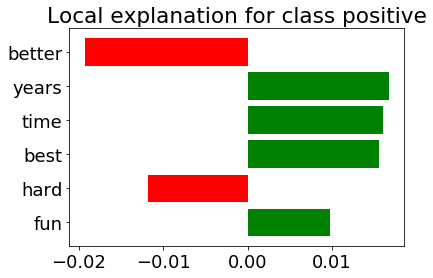

In [63]:
explanation.as_figure(movie_classes[label])

In [ ]:
score_mass_samples = []
for i in range(500, 5001, 500):    
    explanation = explainer.explain_prediction(instance, label, np.array(vectorizer.get_feature_names()), 
                                               rf, num_features=6, num_samples=i)#, random_seed=42)
    score_mass_samples.append(explanation.score)

In [ ]:
score_mass_kernels = []
for i in [0.25, 0.5, 0.75, 1.25, 3., 5., 10., 15., 20.]:
    explainer = text_processing.TextExplainer(distance='cosine', kernel_width=i)
    explanation = explainer.explain_prediction(instance, label, np.array(vectorizer.get_feature_names()), 
                                               rf, num_features=6, num_samples=1000)#, random_seed=42)
    score_mass_kernels.append(explanation.score)

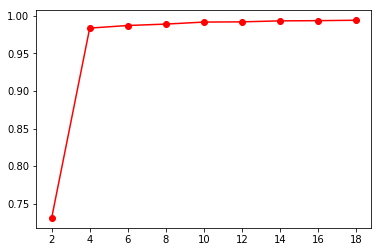

In [131]:
fig = plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 18})

plt.xlabel('number of samples')
plt.ylabel('r2 score')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.plot(np.arange(500, 5001, 500), score_mass_samples, 'bo-')#, label = 'with hide color')
plt.title('Score vs. number of samples')
#plt.legend()

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 18})

plt.xlabel('kernel width')
plt.ylabel('r2 score')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.plot(np.array([0.25, 0.5, 0.75, 1.25, 3., 5., 10., 15., 20.]), score_mass_kernels, 'bo-')#, label = 'with hide color')
plt.title('Score vs. kernel width')
#plt.legend()